In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.measure import compare_ssim

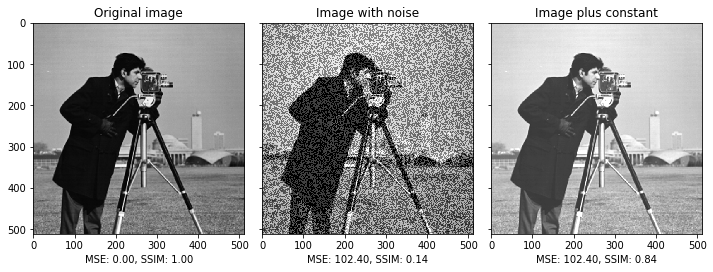

In [4]:
img = img_as_float(data.camera())
rows, cols = img.shape

def mse(x, y):
    return np.linalg.norm(x - y)

noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
noise[np.random.random(size=noise.shape) > 0.5] *= -1

img_noise = img + noise
img_const = img + abs(noise)
    
fig, axes = plt.subplots(nrows=1, ncols=3, 
                         figsize=(10, 4),
                         sharex=True, 
                         sharey=True)
ax = axes.ravel()

mse_none = mse( img, img)
ssim_none = compare_ssim(img, img, 
                         data_range=(img.max() - img.min()))

mse_noise = mse( img, img_noise)
ssim_noise = compare_ssim(img, img_noise, 
                          data_range=(img_noise.max() - img_noise.min()))

mse_const = mse( img, img_const)
ssim_const = compare_ssim(img, img_const, 
                          data_range=(img_const.max() - img_const.min()))

label = 'MSE: {:.2f}, SSIM: {:.2f}'

ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(label.format(mse_none, ssim_none))
ax[0].set_title('Original image')

ax[1].imshow(img_noise, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(label.format(mse_noise, ssim_noise))
ax[1].set_title('Image with noise')

ax[2].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(label.format(mse_const, ssim_const))
ax[2].set_title('Image plus constant')

plt.tight_layout()
plt.show()